### Lab 6 Timeseries Analysis

In this lab, you will work with timeseries data. We will use the basic Python library,the statsmodel libary for statistical computations (https://github.com/statsmodels/statsmodels/) and the tslearn library (https://tslearn.readthedocs.io/en/stable/). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)


## Data overview

This dataset contains information on the quality of the air as measured by air quallity instruments for 2 years.


In [2]:
data= pd.read_csv('air_quality_stats.csv')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 1


### 1: Change the Date column to a pandas date-time object and set the date column as the index of your dataframe.

  


</div>

In [4]:
#Please implement Task 1a here
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index(data['DateTime'])

data = data.drop(['Date', 'Time'], axis=1)


 ### Timeseries Components

A timeseries signal is composed of the trend, seasonality, level and the presence of outliers.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2

### 2a: Plot the feature 'NOx(GT)' per date. Use visual inspection on the timeseries generated and give your opinion on the Level (constant variance or non-constant variance), Trend, Seasonality, presence of outliers.
### 2b: Plot the feature 'PT08.S1(CO)' per date. Use visual inspection on the timeseries generated and give your opinion on the Level (constant variance or non-constant variance), Trend, Seasonality, presence of outliers.

  


</div>

<Axes: xlabel='DateTime', ylabel='NOx(GT)'>

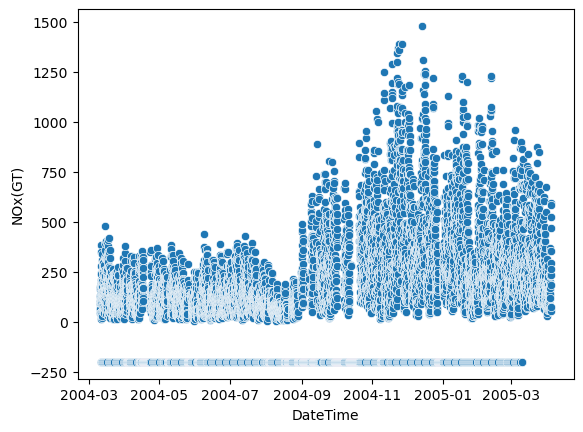

In [5]:
#Please implement Task 2a here
sns.scatterplot(x=data['DateTime'], y=data['NOx(GT)'])

Since we can see points scattered from zero to the local peak, we can assume there is a constant variance dependent on the time of day (probably). There is also a noticeable difference in peak NOx(GT) from March to September and October to February. This plot indicates that the air experiences higher amounts of NOx(GT) during the winter months. Outliers below the local peak are hard to distinguish since those areas are filled with data points. However, there are a lot of values at approximately y=240 that could be considered outliers. Outliers above their local peaks are distinguishable.

<Axes: xlabel='DateTime', ylabel='PT08.S1(CO)'>

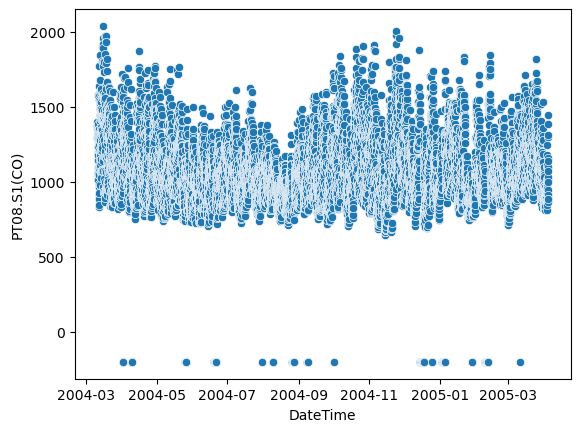

In [6]:
#Please implemnt Task 2b here
sns.scatterplot(x=data['DateTime'], y=data['PT08.S1(CO)'])

The results are mostly similar to NOx(GT), but there are a few key differences with PT08.S1(CO). For instance, PT08.S1(CO) drops down to about 600 and doesn’t seem to change between summer and winter. Also, there are fewer data points under zero that might be considered outliers.

## Seasonal Decomposition

Seasonal decomposition is based on the concept that a timeseries signal is made up of several components added or multiplied together. These underlying components are usually the trend, seasonality and residuals. Seasonal decomposition helps us to better understand the underlying patterns in a timeseries signal.

##### Additive: y(t) = Trend + Seasonality + Residuals
##### Multiplicative: y(t) = Trend * Seasonality * Residuals

The additive model is applied in seasonal decomposition when the seasonal variation remains relatively stable over time, whereas the multiplicative model is utilized when the seasonal variation escalates as time progresses.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 3

### 3a: Use Seasonal Decomposition to decompose the signals you plotted in Task 2. You are to determine whether this is multiplicative or additive model.
    
### 3b:Were your assumptions on the trend and seasonality from Task 2 correct?

</div>

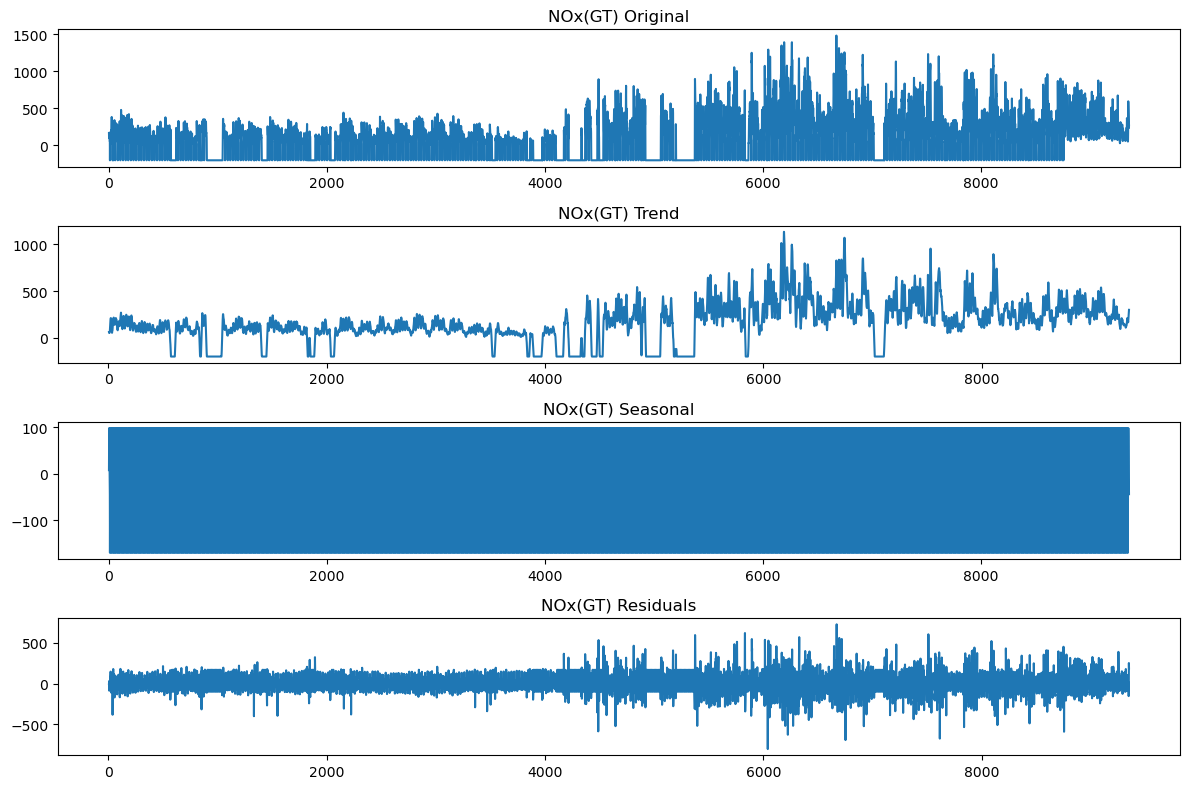

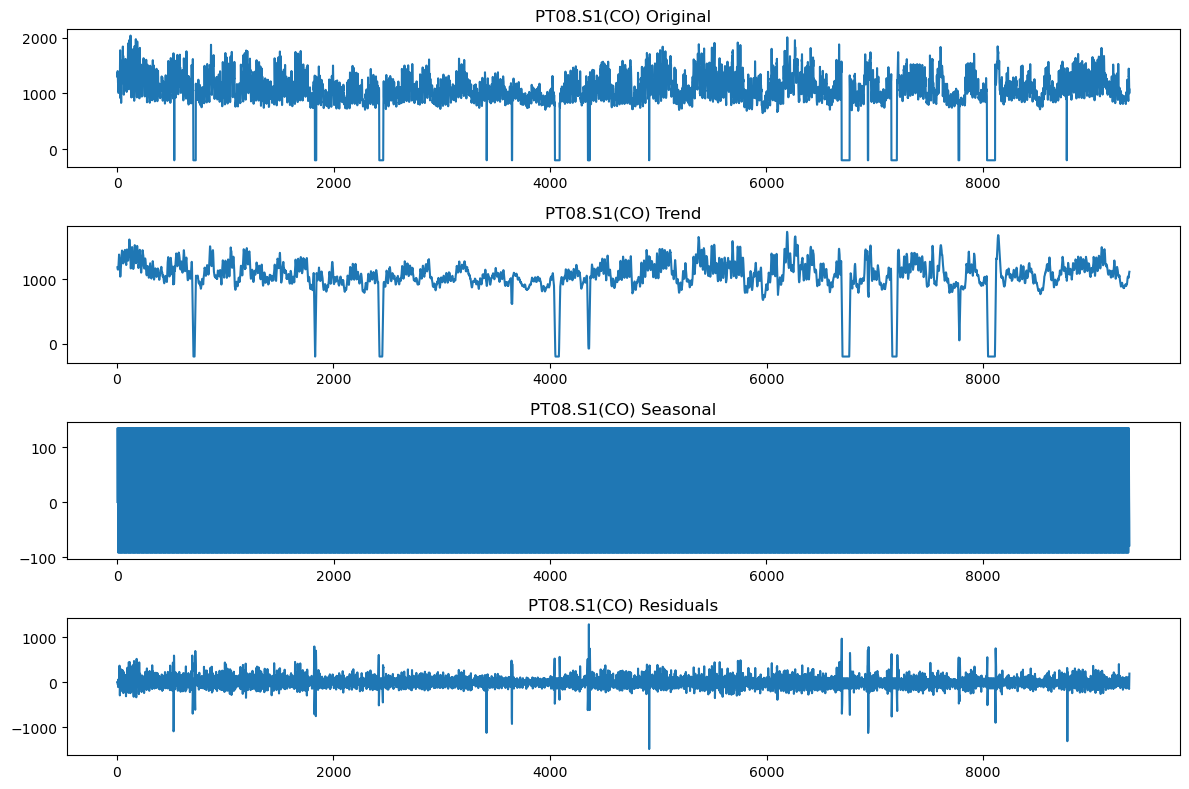

In [7]:
#Please implement Task 3a here

import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(data['NOx(GT)'], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411).set(title='NOx(GT) Original')
plt.plot(decomposition.observed)
plt.subplot(412).set(title='NOx(GT) Trend')
plt.plot(decomposition.trend)
plt.subplot(413).set(title='NOx(GT) Seasonal')
plt.plot(decomposition.seasonal)
plt.subplot(414).set(title='NOx(GT) Residuals')
plt.plot(decomposition.resid)
plt.tight_layout()

decomposition = sm.tsa.seasonal_decompose(data['PT08.S1(CO)'], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411).set(title='PT08.S1(CO) Original')
plt.plot(decomposition.observed)
plt.subplot(412).set(title='PT08.S1(CO) Trend')
plt.plot(decomposition.trend)
plt.subplot(413).set(title='PT08.S1(CO) Seasonal')
plt.plot(decomposition.seasonal)
plt.subplot(414).set(title='PT08.S1(CO) Residuals')
plt.plot(decomposition.resid)
plt.tight_layout()


The signals are multiplicative beause the magnitude of the seasonal pattern changes proportionally with the level of the series.

In [8]:
#Please answer Task 3b here
"""Yes they where correct."""

'Yes they where correct.'

## Stationarity Test using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used to check for stationarity in a timeseries. A stationary time series is one in which its statistical characteristics, including mean, variance, covariance, and standard deviation, remain constant over time.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 4

### 4: Use the Augmented Dickey-Fuller test to determine whether the two time series signals are stationary or not. Report the p_value obtained for each of the signals
  


</div>

In [9]:
#Please implement Task 4 here

from statsmodels.tsa.stattools import adfuller

result1 = adfuller(data['NOx(GT)'])
print(f'NOx(GT) p-value: {result1[1]}')


result2 = adfuller(data['PT08.S1(CO)'])
print(f'PT08.S1(CO) p-value: {result2[1]}')

"""Both P-Values are very small which means both of them are stationary"""


NOx(GT) p-value: 1.1470358091879169e-11
PT08.S1(CO) p-value: 3.7284315740425914e-19


'Both P-Values are very small which means both of them are stationary'

### Forecasting a timeseries

Forecasting a timeseries involves making predictions on future values. The different types of models for forecasting timeseries data include: 

##### Statistical Methods include Exponential Smoothing, AR, MA, ARIMA, SARIMA, ARMA,
##### State-space models include Kalman filter, HMMs, 
##### Deep learning models include RNNs, CNNs and LSTMs.

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 5

### 5: Forecast the values of the PT08.S1(CO) variable for the next 3 months from 2005-04-04. Use two different methods of your choice. Plot the predicitions and compare the predictions made. Which one is better?.


</div>

[Text(0.5, 1.0, 'Exponential Smoothing Prediciton')]

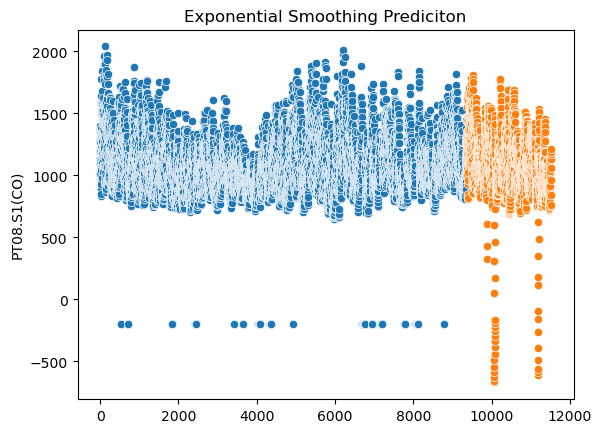

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data['PT08.S1(CO)'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.2)
#print(model.params)

hours_in_3_months = 24*30*3

prediction = model.predict(start=0, end=hours_in_3_months)

index=range(9357,9357+hours_in_3_months+1)
prediction = pd.Series(list(prediction), index=index)

sns.scatterplot(data['PT08.S1(CO)'])
sns.scatterplot(prediction).set(title='Exponential Smoothing Prediciton')

[Text(0.5, 1.0, 'Auto Regression Prediciton')]

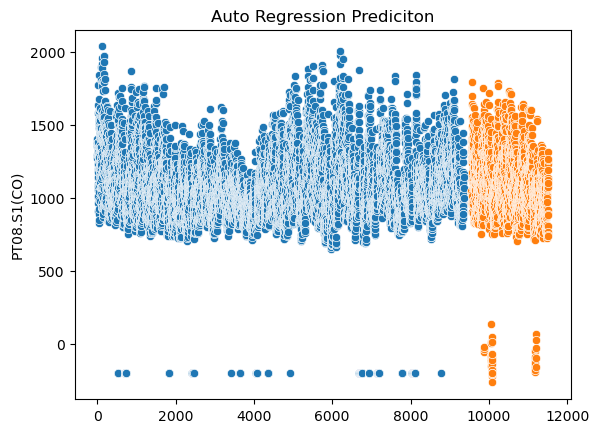

In [11]:
#Please implement Task 5 here

from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(data['PT08.S1(CO)'], lags=200).fit()
#print(model.params)

hours_in_3_months = 24*30*3
prediction = model.predict(start=0, end=hours_in_3_months, dynamic=False)

index=range(9357,9357+hours_in_3_months+1)
prediction = pd.Series(list(prediction), index=index)

sns.scatterplot(data['PT08.S1(CO)'])
sns.scatterplot(prediction).set(title='Auto Regression Prediciton')

### Auto Regression gave the best prediction. It gave a smoother prediction that is more similar to the historic data.

### Timeseries Clustering

In timeseries clustering, our aim is to find similarities between the datapoints in our series. This is an important tool when patterns are not visible by visual inspection. Dynamic Time Warping helps us achieves this by measuring the dissimilarity or warping distance between data points in a time series. Unlike Euclidean distance, DTW handles potential temporal shifts,or  stretches between the data points, making it effective in capturing the true similarity between sequences with different temporal behaviors.


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 6

### Cluster the data with timeseries Kmeans and Dynamic Time Warping. Plot the clustered data and show the cluster centers.
  
Hint: The tslearn library has a timeseries clustering method

</div>

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/usr/lib/python3.11/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 13 1-dimensional timeseries
  warnings.warn(


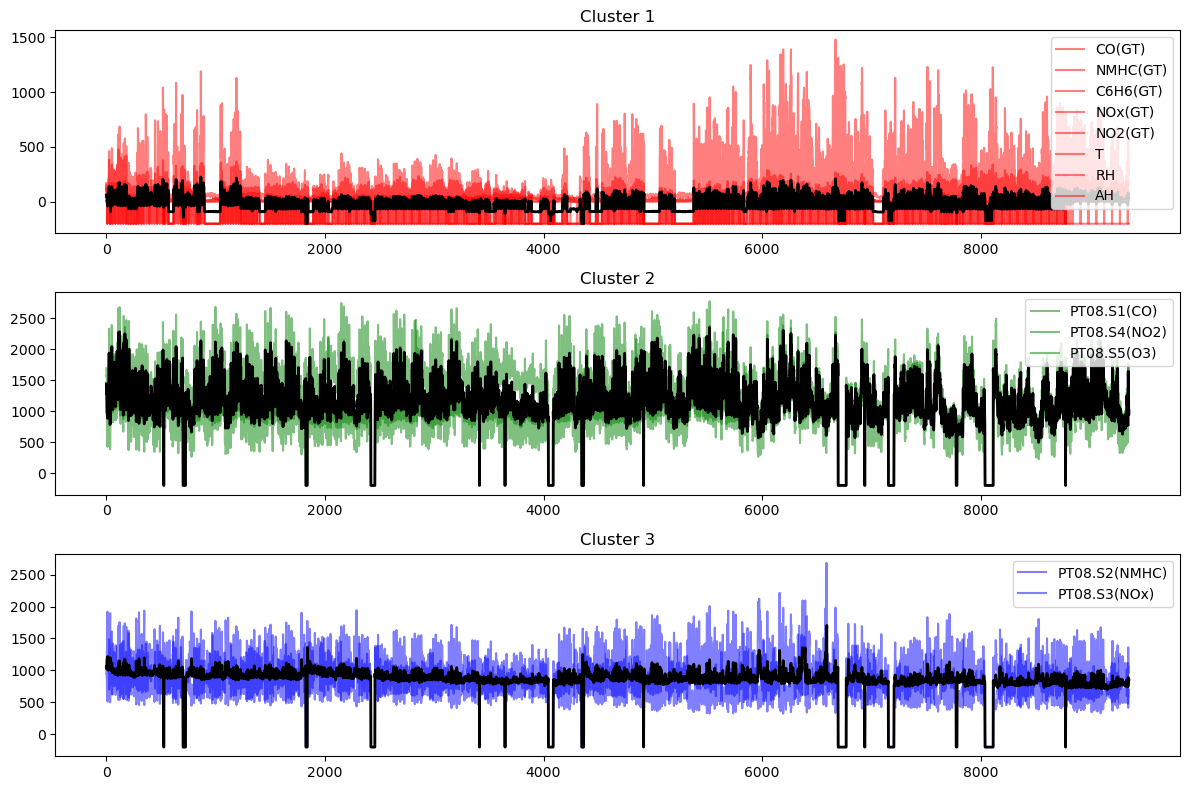

In [12]:
#Please implement Task 6 here

from tslearn.clustering import TimeSeriesKMeans

X = data.drop('DateTime', axis=1).transpose()
clusters = 3

km = TimeSeriesKMeans(n_clusters=clusters, metric="euclidean", max_iter=5, random_state=0).fit(X)
pred = km.predict(X)

plt.figure(figsize=(12, 8))

colors = ['r', 'g', 'b']

for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X[pred == yi].index:
        plt.plot(X.loc[xx].ravel(), color=colors[yi], alpha=0.5)
    plt.legend(X[pred == yi].index)
    plt.plot(km.cluster_centers_[yi].ravel(), color='k', linewidth=2)
    plt.title(f"Cluster {yi + 1}")

plt.tight_layout()
plt.show()
